In [ ]:
import pandas as pd

# Load dataset (replace 'your_data.csv' with actual file path)
df = pd.read_csv('data/PhysicalRisks.csv')

# Identify the columns to keep and the ones to melt
id_vars = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Full Descriptor', 'CTS Code', 'CTS Name']
value_vars = [col for col in df.columns if col.isdigit()]  # Years as columns

# Convert wide dataset to long format
df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Value')

# Convert Year to integer
df_long['Year'] = df_long['Year'].astype(int)

# drop rows Unit, ISO2,ISO3, CTS Full Descriptor,CTS Code,CTS Name, Source
df_long = df_long.drop(columns=['ObjectId','Unit', 'ISO2', 'ISO3', 'CTS Full Descriptor', 'CTS Code', 'CTS Name', 'Source'])
#If missing value in Value column, assume it is 0
df_long['Value'] = df_long['Value'].fillna(0)

# Filter out all fields but "Climate related disasters frequency, Number of Disasters: TOTAL"
df_long = df_long[df_long['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL']

#Remove the country that is the outlier
df_long = df_long[df_long['Country'] != 'All Countries and International Organizations']

# Take the 5 year average of each country's Value
df_long['5 Year Average'] = df_long.groupby('Country')['Value'].transform(lambda x: x.rolling(10, 1).mean())

#What are the five highest 5-year averages of countries
df_long.sort_values(by='5 Year Average', ascending=False).head(5)








,Country,Indicator,Year,Value,5 Year Average
62015,United States,"Climate related disasters frequency, Number of...",2001,26.0,28.6
63914,United States,"Climate related disasters frequency, Number of...",2002,29.0,28.2
64838,United States,"Climate related disasters frequency, Number of...",2002,29.0,27.8
61091,United States,"Climate related disasters frequency, Number of...",2001,26.0,27.4
124121,United States,"Climate related disasters frequency, Number of...",2023,24.0,27.0


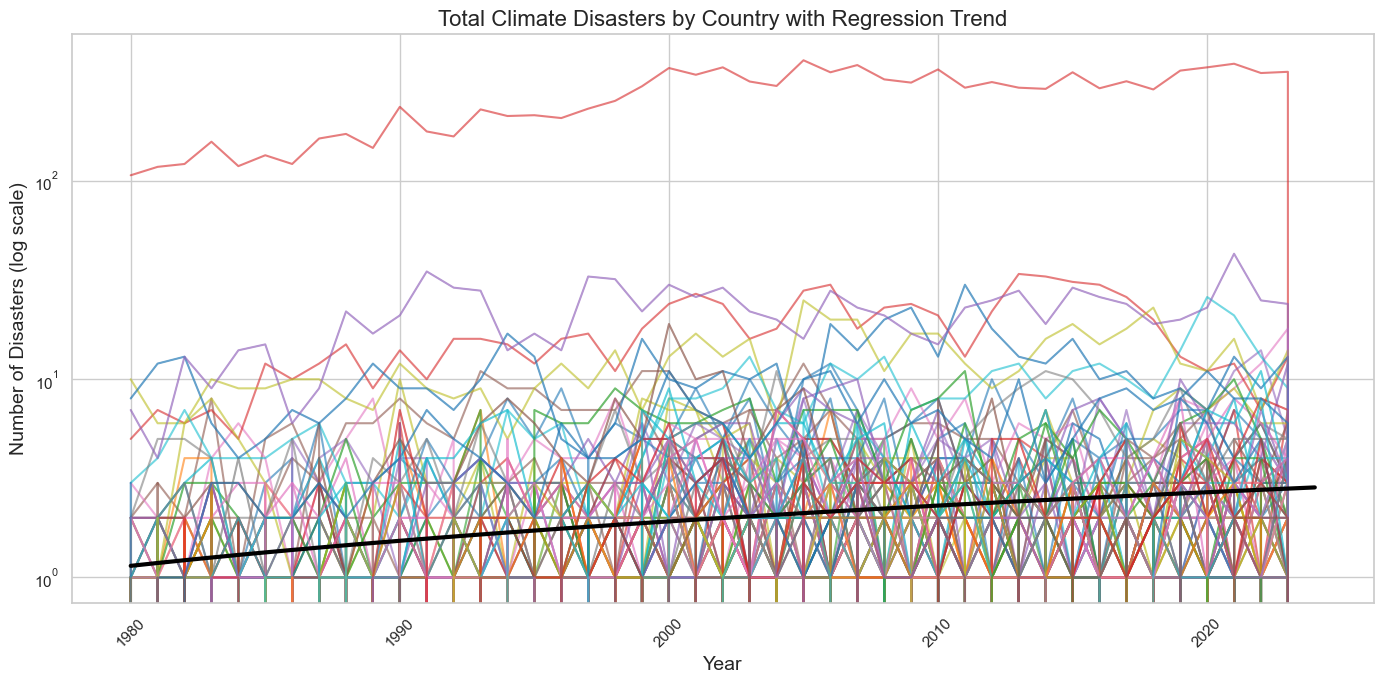

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Load dataset (replace 'your_data.csv' with actual file path)
df = pd.read_csv('data/PhysicalRisks.csv')

# Identify the columns to keep and the ones to melt
id_vars = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Full Descriptor', 'CTS Code', 'CTS Name']
value_vars = [col for col in df.columns if col.isdigit()]  # Years as columns

# Convert wide dataset to long format
df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Value')

# Convert Year to integer
df_long['Year'] = df_long['Year'].astype(int)

# Drop unnecessary columns
df_long = df_long.drop(columns=['ObjectId','Unit', 'ISO2', 'ISO3', 'CTS Full Descriptor', 'CTS Code', 'CTS Name', 'Source'])

# If missing value in Value column, assume it is 0
df_long['Value'] = df_long['Value'].fillna(0)

# Filter out all fields but "Climate related disasters frequency, Number of Disasters: TOTAL"
df_long = df_long[df_long['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL']

# Plot settings
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Use seaborn lineplot for clearer visualization
sns.lineplot(data=df_long, x='Year', y='Value', hue='Country', alpha=0.6, linewidth=1.5, palette='tab10')

# Compute regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df_long['Year'], df_long['Value'])
df_long['Regression'] = slope * df_long['Year'] + intercept

# Plot regression line
sns.lineplot(data=df_long, x='Year', y='Regression', color='black', linewidth=3, label='Regression Trend')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Improve aesthetics
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Disasters (log scale)', fontsize=14)
plt.title('Total Climate Disasters by Country with Regression Trend', fontsize=16)
#plt.legend(title='Country', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
# don't include legend
plt.legend().remove()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\agrab\AppData\Local\Temp\ipykernel_13824\1704818069.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', num_years)  # Using 'tab20' colormap for diverse colors


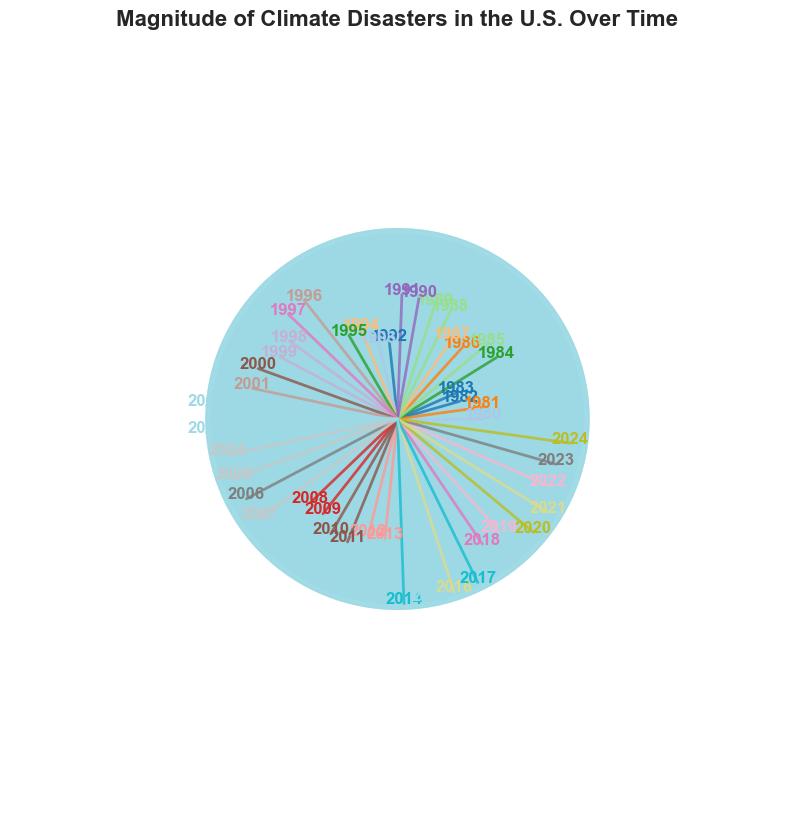

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load dataset
df = pd.read_csv('data/PhysicalRisks.csv')

# Identify the columns to keep and the ones to melt
id_vars = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Full Descriptor', 'CTS Code', 'CTS Name']
value_vars = [col for col in df.columns if col.isdigit()]  # Years as columns

# Convert wide dataset to long format
df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Value')

# Convert Year to integer
df_long['Year'] = df_long['Year'].astype(int)

# Drop unnecessary columns
df_long = df_long.drop(columns=['ObjectId', 'Unit', 'ISO2', 'ISO3', 'CTS Full Descriptor', 'CTS Code', 'CTS Name', 'Source'])

# If missing value in Value column, assume it is 0
df_long['Value'] = df_long['Value'].fillna(0)

# Filter only for the United States and "Climate related disasters frequency, Number of Disasters: TOTAL"
df_us = df_long[(df_long['Country'] == 'United States') & 
                (df_long['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL')]

# Normalize the size of the circles
max_disasters = df_us['Value'].max()

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Define evenly spaced angles for year labels
num_years = len(df_us['Year'].unique())
angles = np.linspace(0, 2 * np.pi, num_years, endpoint=False)  # Evenly distribute around the circle

# Get a colormap for unique year colors
colormap = cm.get_cmap('tab20', num_years)  # Using 'tab20' colormap for diverse colors

# Plot concentric circles and label each year exactly once
for i, (year, value, angle) in enumerate(sorted(zip(df_us['Year'].unique(), df_us['Value'], angles), key=lambda x: x[1])):
    radius = np.sqrt((value / max_disasters) * 3000) / 100  # Normalize radius
    
    # Assign a color from the colormap for both the circle and the label
    circle_color = colormap(i)
    
    # Create the circle (add larger circles later, so they are behind smaller ones)
    circle = plt.Circle((0, 0), radius, color=circle_color, alpha=0.8)  # More opacity for better visibility
    ax.add_patch(circle)
    
    # Compute label position using polar coordinates
    x_text = np.cos(angle) * radius
    y_text = np.sin(angle) * radius
    ax.text(x_text, y_text, str(year), ha='center', fontsize=12, fontweight='bold', color=circle_color)  # Matching label color to circle
    
    # Draw lines connecting year labels to the circles (if needed)
    ax.plot([0, x_text], [0, y_text], color=circle_color, lw=2, alpha=0.8)

# Add title
plt.title('Magnitude of Climate Disasters in the U.S. Over Time', fontsize=16, fontweight='bold')
plt.show()


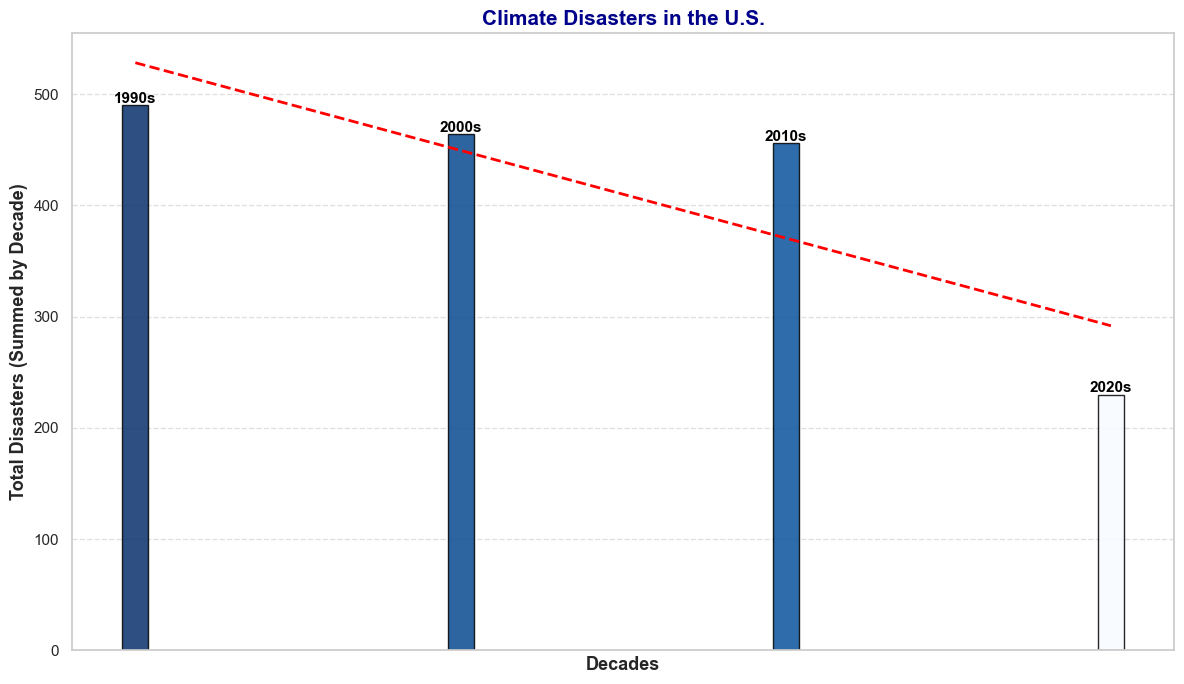

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data
df = pd.read_csv('data/PhysicalRisks.csv')

# Transform Data
id_vars = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Full Descriptor', 'CTS Code', 'CTS Name']
value_vars = [col for col in df.columns if col.isdigit()]  # Extract year columns

df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Value')
df_long['Year'] = df_long['Year'].astype(int)
df_long = df_long.drop(columns=['ObjectId', 'Unit', 'ISO2', 'ISO3', 'CTS Full Descriptor', 'CTS Code', 'CTS Name', 'Source'])
df_long['Value'] = df_long['Value'].fillna(0)

# Filter for U.S. Data
df_us = df_long[(df_long['Country'] == 'United States') & 
                (df_long['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL')].copy()

df_us['Decade'] = (df_us['Year'] // 10) * 10
df_decade = df_us.groupby('Decade', as_index=False)['Value'].sum()

# Remove 1980s Data
df_decade = df_decade[df_decade['Decade'] != 1980]

# Sort Decades Properly
df_decade = df_decade.sort_values(by='Decade').reset_index(drop=True)

# Define Colors Based on Magnitude
norm = plt.Normalize(df_decade['Value'].min(), df_decade['Value'].max())  # Normalize values
colors = plt.cm.Blues(norm(df_decade['Value']))  # Map values to colormap

# Fit a Linear Regression Line
x = df_decade['Decade']
y = df_decade['Value']
slope, intercept = np.polyfit(x, y, 1)  # Linear regression: y = mx + b
y_pred = slope * x + intercept  # Predicted values

# Create Plot
plt.figure(figsize=(12, 7))
bars = plt.bar(x, y, color=colors, alpha=0.85, edgecolor='black')

# Add Regression Line
plt.plot(x, y_pred, color='red', linestyle='--', linewidth=2, label=f'Regression Line (Slope: {slope:.2f})')

# Add Value Labels
for bar, decade, value in zip(bars, x, y):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 2, 
             f"{decade}s", 
             ha='center', fontsize=11, fontweight='bold', color='black')
    
# Remove X-Axis Label
plt.xlabel('Decades', fontsize=13, fontweight='bold')

# Format X-Axis
plt.xticks([])
# Y-Axis Formatting
plt.ylabel('Total Disasters (Summed by Decade)', fontsize=13, fontweight='bold')
plt.yticks(fontsize=11)

# Title & Grid
plt.title('Climate Disasters in the U.S.', fontsize=15, fontweight='bold', color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save Plot
plt.savefig('climate_disasters_usa.png', dpi=300)

# Improve Layout
plt.tight_layout()
plt.show()


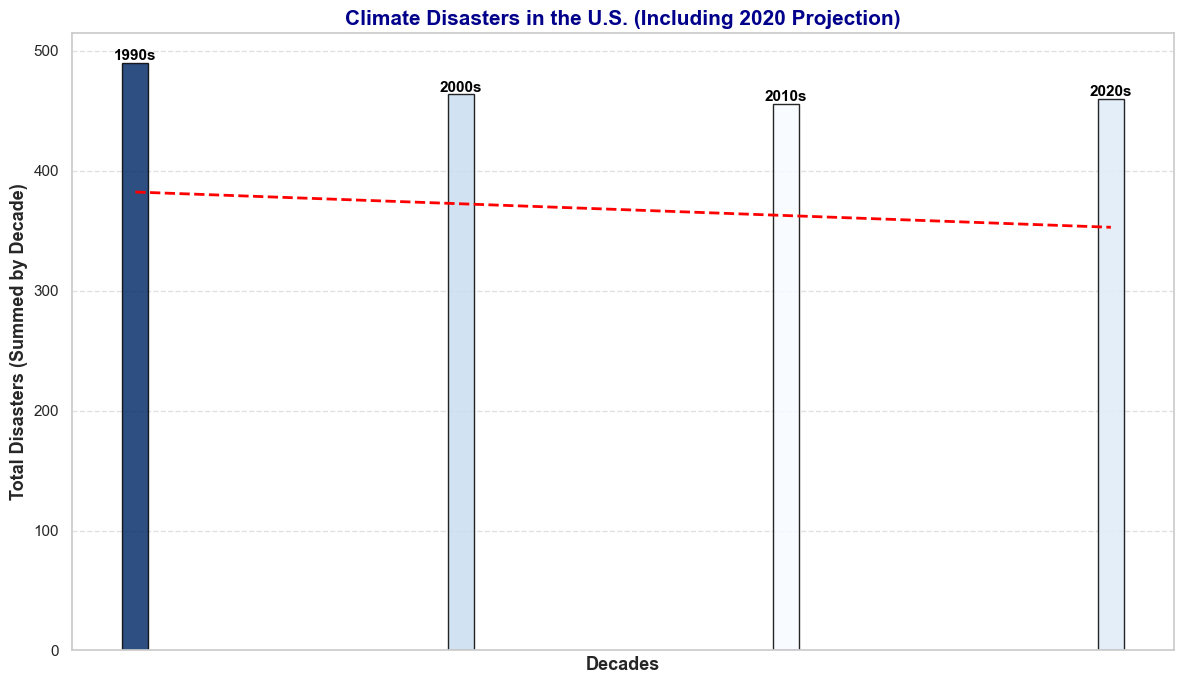

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data
df = pd.read_csv('data/PhysicalRisks.csv')

# Transform Data
id_vars = ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS Full Descriptor', 'CTS Code', 'CTS Name']
value_vars = [col for col in df.columns if col.isdigit()]  # Extract year columns

df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Value')
df_long['Year'] = df_long['Year'].astype(int)
df_long = df_long.drop(columns=['ObjectId', 'Unit', 'ISO2', 'ISO3', 'CTS Full Descriptor', 'CTS Code', 'CTS Name', 'Source'])
df_long['Value'] = df_long['Value'].fillna(0)

# Filter for U.S. Data
df_us = df_long[(df_long['Country'] == 'United States') & 
                (df_long['Indicator'] == 'Climate related disasters frequency, Number of Disasters: TOTAL')].copy()

# Perform Regression to Predict 2020 Value
df_train = df_us[df_us['Year'] < 2020]  # Use only years before 2020 for training
x_train = df_train['Year']
y_train = df_train['Value']


# Adjust the 2020s decade value by adding the projected 2020-2024 total
df_decade.loc[df_decade['Decade'] == 2020, 'Value'] = df_us[df_us['Year'] >= 2020]['Value'].sum()*10/5


# Remove 1980s Data
df_decade = df_decade[df_decade['Decade'] != 1980]

# Sort Decades Properly
df_decade = df_decade.sort_values(by='Decade').reset_index(drop=True)

# Define Colors Based on Magnitude
norm = plt.Normalize(df_decade['Value'].min(), df_decade['Value'].max())  # Normalize values
colors = plt.cm.Blues(norm(df_decade['Value']))  # Map values to colormap

# Fit a Linear Regression Line
x = df_decade['Decade']
y = df_decade['Value']
slope, intercept = np.polyfit(x, y, 1)  # Linear regression: y = mx + b
y_pred = slope * x + intercept  # Predicted values

# Create Plot
plt.figure(figsize=(12, 7))
bars = plt.bar(x, y, color=colors, alpha=0.85, edgecolor='black')

# Add Regression Line
plt.plot(x, y_pred-100, color='red', linestyle='--', linewidth=2, label=f'Regression Line (Slope: {slope:.2f})')


# Add Value Labels
for bar, decade, value in zip(bars, x, y):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 2, 
             f"{decade}s", 
             ha='center', fontsize=11, fontweight='bold', color='black')
    
# Remove X-Axis Label
plt.xlabel('Decades', fontsize=13, fontweight='bold')

# Format X-Axis
plt.xticks([])
# Y-Axis Formatting
plt.ylabel('Total Disasters (Summed by Decade)', fontsize=13, fontweight='bold')
plt.yticks(fontsize=11)

# Title & Grid
plt.title('Climate Disasters in the U.S. (Including 2020 Projection)', fontsize=15, fontweight='bold', color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save Plot
plt.savefig('climate_disasters_usa_con.png', dpi=300)

# Improve Layout
plt.tight_layout()
plt.show()


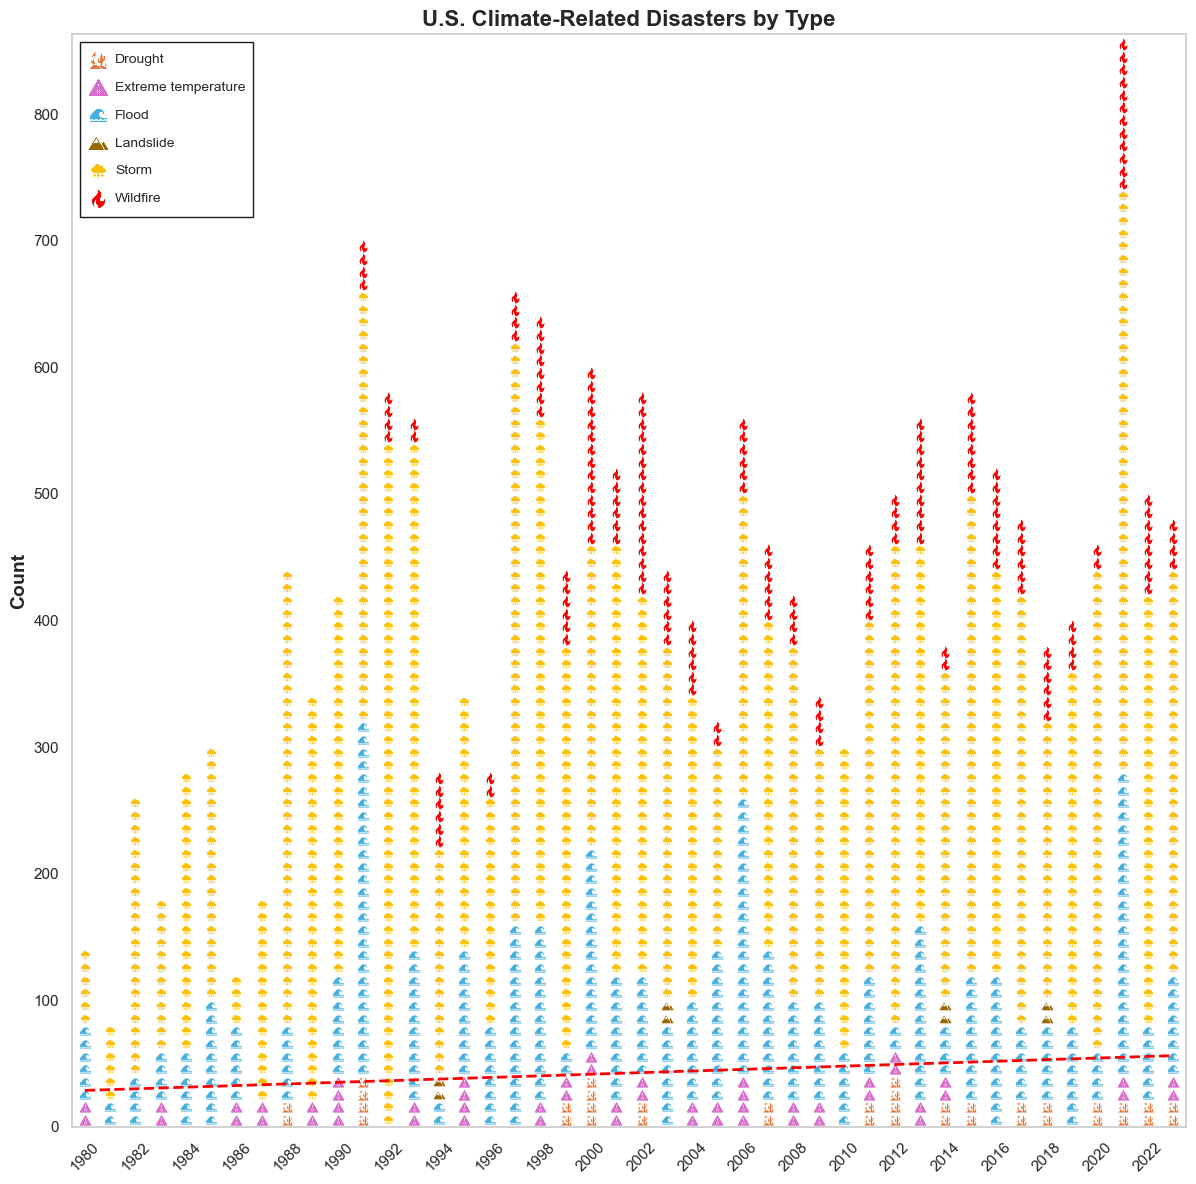

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib.offsetbox import AnchoredOffsetbox, VPacker, HPacker, TextArea, OffsetImage
from matplotlib.lines import Line2D

# -----------------------------
# PARAMETERS
# -----------------------------
x_spacing = 20          # Horizontal spacing between each year's column
icon_data_size = 10     # Size (in data units) for each icon on the plot
image_size = (300, 300) # Pixel dimensions for each resized image
legend_zoom = 0.05      # Zoom factor for icons in the custom legend

# -----------------------------
# 1) LOAD AND TRANSFORM DATA
# -----------------------------
df = pd.read_csv('data/PhysicalRisks.csv')

id_vars = [
    'ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
    'CTS Full Descriptor', 'CTS Code', 'CTS Name'
]
value_vars = [col for col in df.columns if col.isdigit()]

df_long = df.melt(id_vars=id_vars, value_vars=value_vars, var_name='Year', value_name='Value')
df_long['Year'] = df_long['Year'].astype(int)
df_long = df_long.drop(columns=['ObjectId', 'Unit', 'ISO2', 'ISO3',
                                  'CTS Full Descriptor', 'CTS Code', 'CTS Name', 'Source'])
df_long['Value'] = df_long['Value'].fillna(0)

#Remove 2024 data
df_long = df_long[df_long['Year'] != 2024]

# -----------------------------
# 2) FILTER FOR U.S. DATA & SELECT DISASTER TYPES
# -----------------------------
disaster_types_list = [
    "Climate related disasters frequency, Number of Disasters: Drought",
    "Climate related disasters frequency, Number of Disasters: Extreme temperature",
    "Climate related disasters frequency, Number of Disasters: Flood",
    "Climate related disasters frequency, Number of Disasters: Landslide",
    "Climate related disasters frequency, Number of Disasters: Storm",
    "Climate related disasters frequency, Number of Disasters: Wildfire"
]

df_us = df_long[df_long['Country'] == 'United States']
df_disasters = df_us[df_us['Indicator'].isin(disaster_types_list)]

# -----------------------------
# 3) MAP DISASTER TYPES TO IMAGE FILES
# -----------------------------
icon_files = {
    "Climate related disasters frequency, Number of Disasters: Drought": "Drought_Graphic.jpg",
    "Climate related disasters frequency, Number of Disasters: Extreme temperature": "Thermometer_Graphic.jpg",
    "Climate related disasters frequency, Number of Disasters: Flood": "Flood_Graphic.jpg",
    "Climate related disasters frequency, Number of Disasters: Landslide": "Landslide.jpg",
    "Climate related disasters frequency, Number of Disasters: Storm": "Storm_Graphic.jpg",
    "Climate related disasters frequency, Number of Disasters: Wildfire": "Fire_Graphic.jpg"
}

def load_and_resize(img_path, size=image_size):
    try:
        img = Image.open(img_path)
        return img.resize(size)
    except Exception as e:
        print(f"Warning: Could not load {img_path}: {e}")
        return None

icons = {}
for indicator in disaster_types_list:
    file_path = icon_files.get(indicator)
    icons[indicator] = load_and_resize(file_path, size=image_size)

# -----------------------------
# 4) SET UP THE FIGURE
# -----------------------------
years = sorted(df_disasters['Year'].unique())
fig, ax = plt.subplots(figsize=(25, 12))

# Compute total counts per year for scaling & regression
year_totals = {}
max_total = 0
for year in years:
    total = 0
    for indicator in disaster_types_list:
        count = int(df_disasters[(df_disasters['Year'] == year) & 
                                   (df_disasters['Indicator'] == indicator)]['Value'].sum())
        total += count
    year_totals[year] = total
    if total > max_total:
        max_total = total

# -----------------------------
# 5) DRAW STACKED ICONS PER YEAR (SINGLE COLUMN)
# -----------------------------
half_width = icon_data_size / 2
for i, year in enumerate(years):
    x_center = i * x_spacing
    y_offset = 0
    for indicator in disaster_types_list:
        count = int(df_disasters[(df_disasters['Year'] == year) &
                                   (df_disasters['Indicator'] == indicator)]['Value'].sum())
        for _ in range(count):
            left = x_center - half_width
            right = x_center + half_width
            bottom = y_offset
            top = y_offset + icon_data_size
            if icons[indicator] is not None:
                ax.imshow(icons[indicator], extent=[left, right, bottom, top], aspect='equal')
            y_offset += icon_data_size

# -----------------------------
# 6) CALCULATE AND PLOT THE REGRESSION LINE
# -----------------------------
x_vals = np.array([i * x_spacing for i in range(len(years))])
y_vals = np.array([year_totals[year] for year in years])
coeffs = np.polyfit(x_vals, y_vals, 1)
y_fit = np.polyval(coeffs, x_vals)
line, = ax.plot(x_vals, y_fit, color='red', linestyle='--', linewidth=2, label="Trend Line")

# -----------------------------
# 7) CREATE A CUSTOM LEGEND FOR ICONS (EXCLUDING THE TREND LINE)
# -----------------------------
legend_items = []
for indicator in disaster_types_list:
    if icons[indicator] is not None:
        # Create a small image box using a reduced zoom factor.
        image_box = OffsetImage(np.array(icons[indicator]), zoom=legend_zoom)
        label_text = indicator.split(":")[-1].strip()
        text_box = TextArea(label_text, textprops=dict(size=10))
        item = HPacker(children=[image_box, text_box], align="center", pad=0, sep=5)
        legend_items.append(item)

legend_box = VPacker(children=legend_items, align="left", pad=0, sep=5)
anchored_box = AnchoredOffsetbox(loc='upper left', child=legend_box,
                                 pad=0.5, frameon=True, borderpad=0.5)
ax.add_artist(anchored_box)

# -----------------------------
# 8) ADD A STANDARD LEGEND ENTRY FOR THE Trend Line
# -----------------------------
# This standard legend will only show the trend line.
#ax.legend(handles=[line], labels=["Trend Line"], loc='upper right', fontsize=12)

# -----------------------------
# 9) FINAL PLOT FORMATTING
# -----------------------------
xtick_positions = [i * x_spacing for i in range(len(years)) if i % 2 == 0]
xtick_labels = [str(year) for i, year in enumerate(years) if i % 2 == 0]
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, rotation=45)

ax.set_xlim(-x_spacing/2, (len(years)-1)*x_spacing + x_spacing/2)
ax.set_ylim(0, max_total * icon_data_size + 3)
ax.set_yticks(np.arange(0, max_total * icon_data_size + 3, 100))
ax.set_ylabel("Count", fontsize=14, fontweight='bold')
ax.set_title("U.S. Climate-Related Disasters by Type", fontsize=16, fontweight='bold')
ax.grid(False)

#save the plot
plt.savefig('climate_disasters_usa.png', dpi=300)


plt.tight_layout()
plt.show()
